In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from tqdm import tqdm
import pandas as pd

In [11]:
# Loading the dataset file
train_features = pd.read_csv('data/Conser-vision_Practice_Area_Image_Classification_-_train_features.csv.csv', index_col='id')
train_labels = pd.read_csv('data/Conser-vision_Practice_Area_Image_Classification_-_train_labels.csv.csv', index_col='id')
test_features = pd.read_csv('data/Conser-vision_Practice_Area_Image_Classification_-_test_features.csv.csv', index_col='id')

In [19]:
train_features.head(), len(train_features)

(                             filepath   site
 id                                          
 ZJ000000  train_features/ZJ000000.jpg  S0120
 ZJ000001  train_features/ZJ000001.jpg  S0069
 ZJ000002  train_features/ZJ000002.jpg  S0009
 ZJ000003  train_features/ZJ000003.jpg  S0008
 ZJ000004  train_features/ZJ000004.jpg  S0036,
 16488)

In [13]:
train_labels.head()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
species = sorted(train_labels.columns.unique())
species, len(species)

(['antelope_duiker',
  'bird',
  'blank',
  'civet_genet',
  'hog',
  'leopard',
  'monkey_prosimian',
  'rodent'],
 8)

> There are *8* different species

## Displaying Images
Now the task is to load and display few images and explore them, we will use random_state=42 for consistency

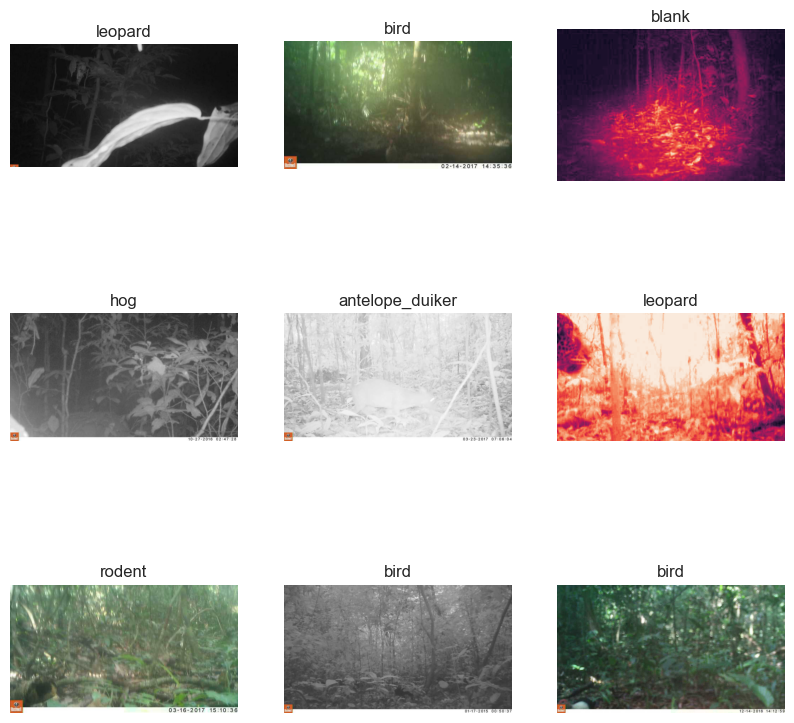

In [74]:
import random
import pathlib

random.seed(42)

# Root image dir
img_dir = 'data'

# Load 9 random images within the range of the train_features
img_index = [random.randint(0, len(train_features) - 1) for _ in range(9)]

fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(10,10))
axs = axs.flatten()
for i, j in enumerate(img_index):
    image_path = pathlib.PurePath(img_dir, train_features.iloc[j]['filepath'])
    image_label = train_labels.columns[np.where(train_labels.iloc[j] == 1)][0]
    image = plt.imread(image_path)
    axs[i].imshow(image)
    axs[i].set_title(image_label)
    axs[i].axis('off')

Can you notice any animal from the picture let's say a bird

In [79]:
# distribution of species across the dataset
train_labels.sum().sort_values(ascending=False)

monkey_prosimian    2492.0
antelope_duiker     2474.0
civet_genet         2423.0
leopard             2254.0
blank               2213.0
rodent              2013.0
bird                1641.0
hog                  978.0
dtype: float64

In [81]:
labels_distribution = train_labels.sum().divide(train_labels.shape[0]).sort_values(ascending=False) # Looking the percentage distribution
labels_distribution

monkey_prosimian    0.151140
antelope_duiker     0.150049
civet_genet         0.146955
leopard             0.136705
blank               0.134219
rodent              0.122089
bird                0.099527
hog                 0.059316
dtype: float64